In [1]:
#pip install pandas numpy scipy matplotlib seaborn scikit-learn statsmodels
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
#os.getcwd()

Table shows that we have data on 2205 customers, including some demographic data as well as information on their purchases.

We have a list of variable descriptions:

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise.
AcceptedCmpOverall - number of campaigns, accepted by customer.
Age - age of customer.
Customer_Days - amount of days since customers registration.
Complain - 1 if customer complained in the last 2 years.
Education - customer's level of education.
Marital - customer's marital status.
Kidhome - number of small children in customer's household.
Teenhome - number of teenagers in customer's household.
Income - customer's yearly household income.
MntFishProducts - amount spent on fish products in the last 2 years.
MntMeatProducts - amount spent on meat products in the last 2 years.
MntFruits - amount spent on fruits in the last 2 years.
MntSweetProducts - amount spent on sweet products in the last 2 years.
MntWines - amount spent on wines in the last 2 years.
MntGoldProds - amount spent on gold products in the last 2 years.
MntTotal - amount spent on products (not gold).
NumDealsPurchases - number of purchases made with discount.
NumCatalogPurchases - number of purchases made using catalogue.
NumStorePurchases - number of purchases made directly in stores.
NumWebPurchases - number of purchases made through company's web site.
NumWebVisitsMonth - number of visits to company's web site in the last month.
Recency - number of days since the last purchase.
This list does no fully explain the variables as we have breakouts for some of the categorical variables. The education variable specifically needs further explanation.

education_2n Cycle - This is the second cycle degree which is equivalent to a masters degree in the US.

education_Basic - According to the UNESCO Institute for Statistics, this refers to having completed primary education and lower secondary education. For reference, in the US this would refer to completing elementary and middle (junior high) school.

education_Graduation - Bachelors degree.



In [2]:
data=pd.read_csv('ifood_df.csv')
data.head(5)
data.tail(5)
#data.insert(0, 'Serial', range(1, 1 + len(data)))
#data.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [3]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


In [4]:
#data.info()
data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [5]:
# Create a heatmap
#s = data['Income']
#s
#for x in s:
#    x1 = int(x)
#    print(type(x1))
#   print(x1)
#data.loc[170]

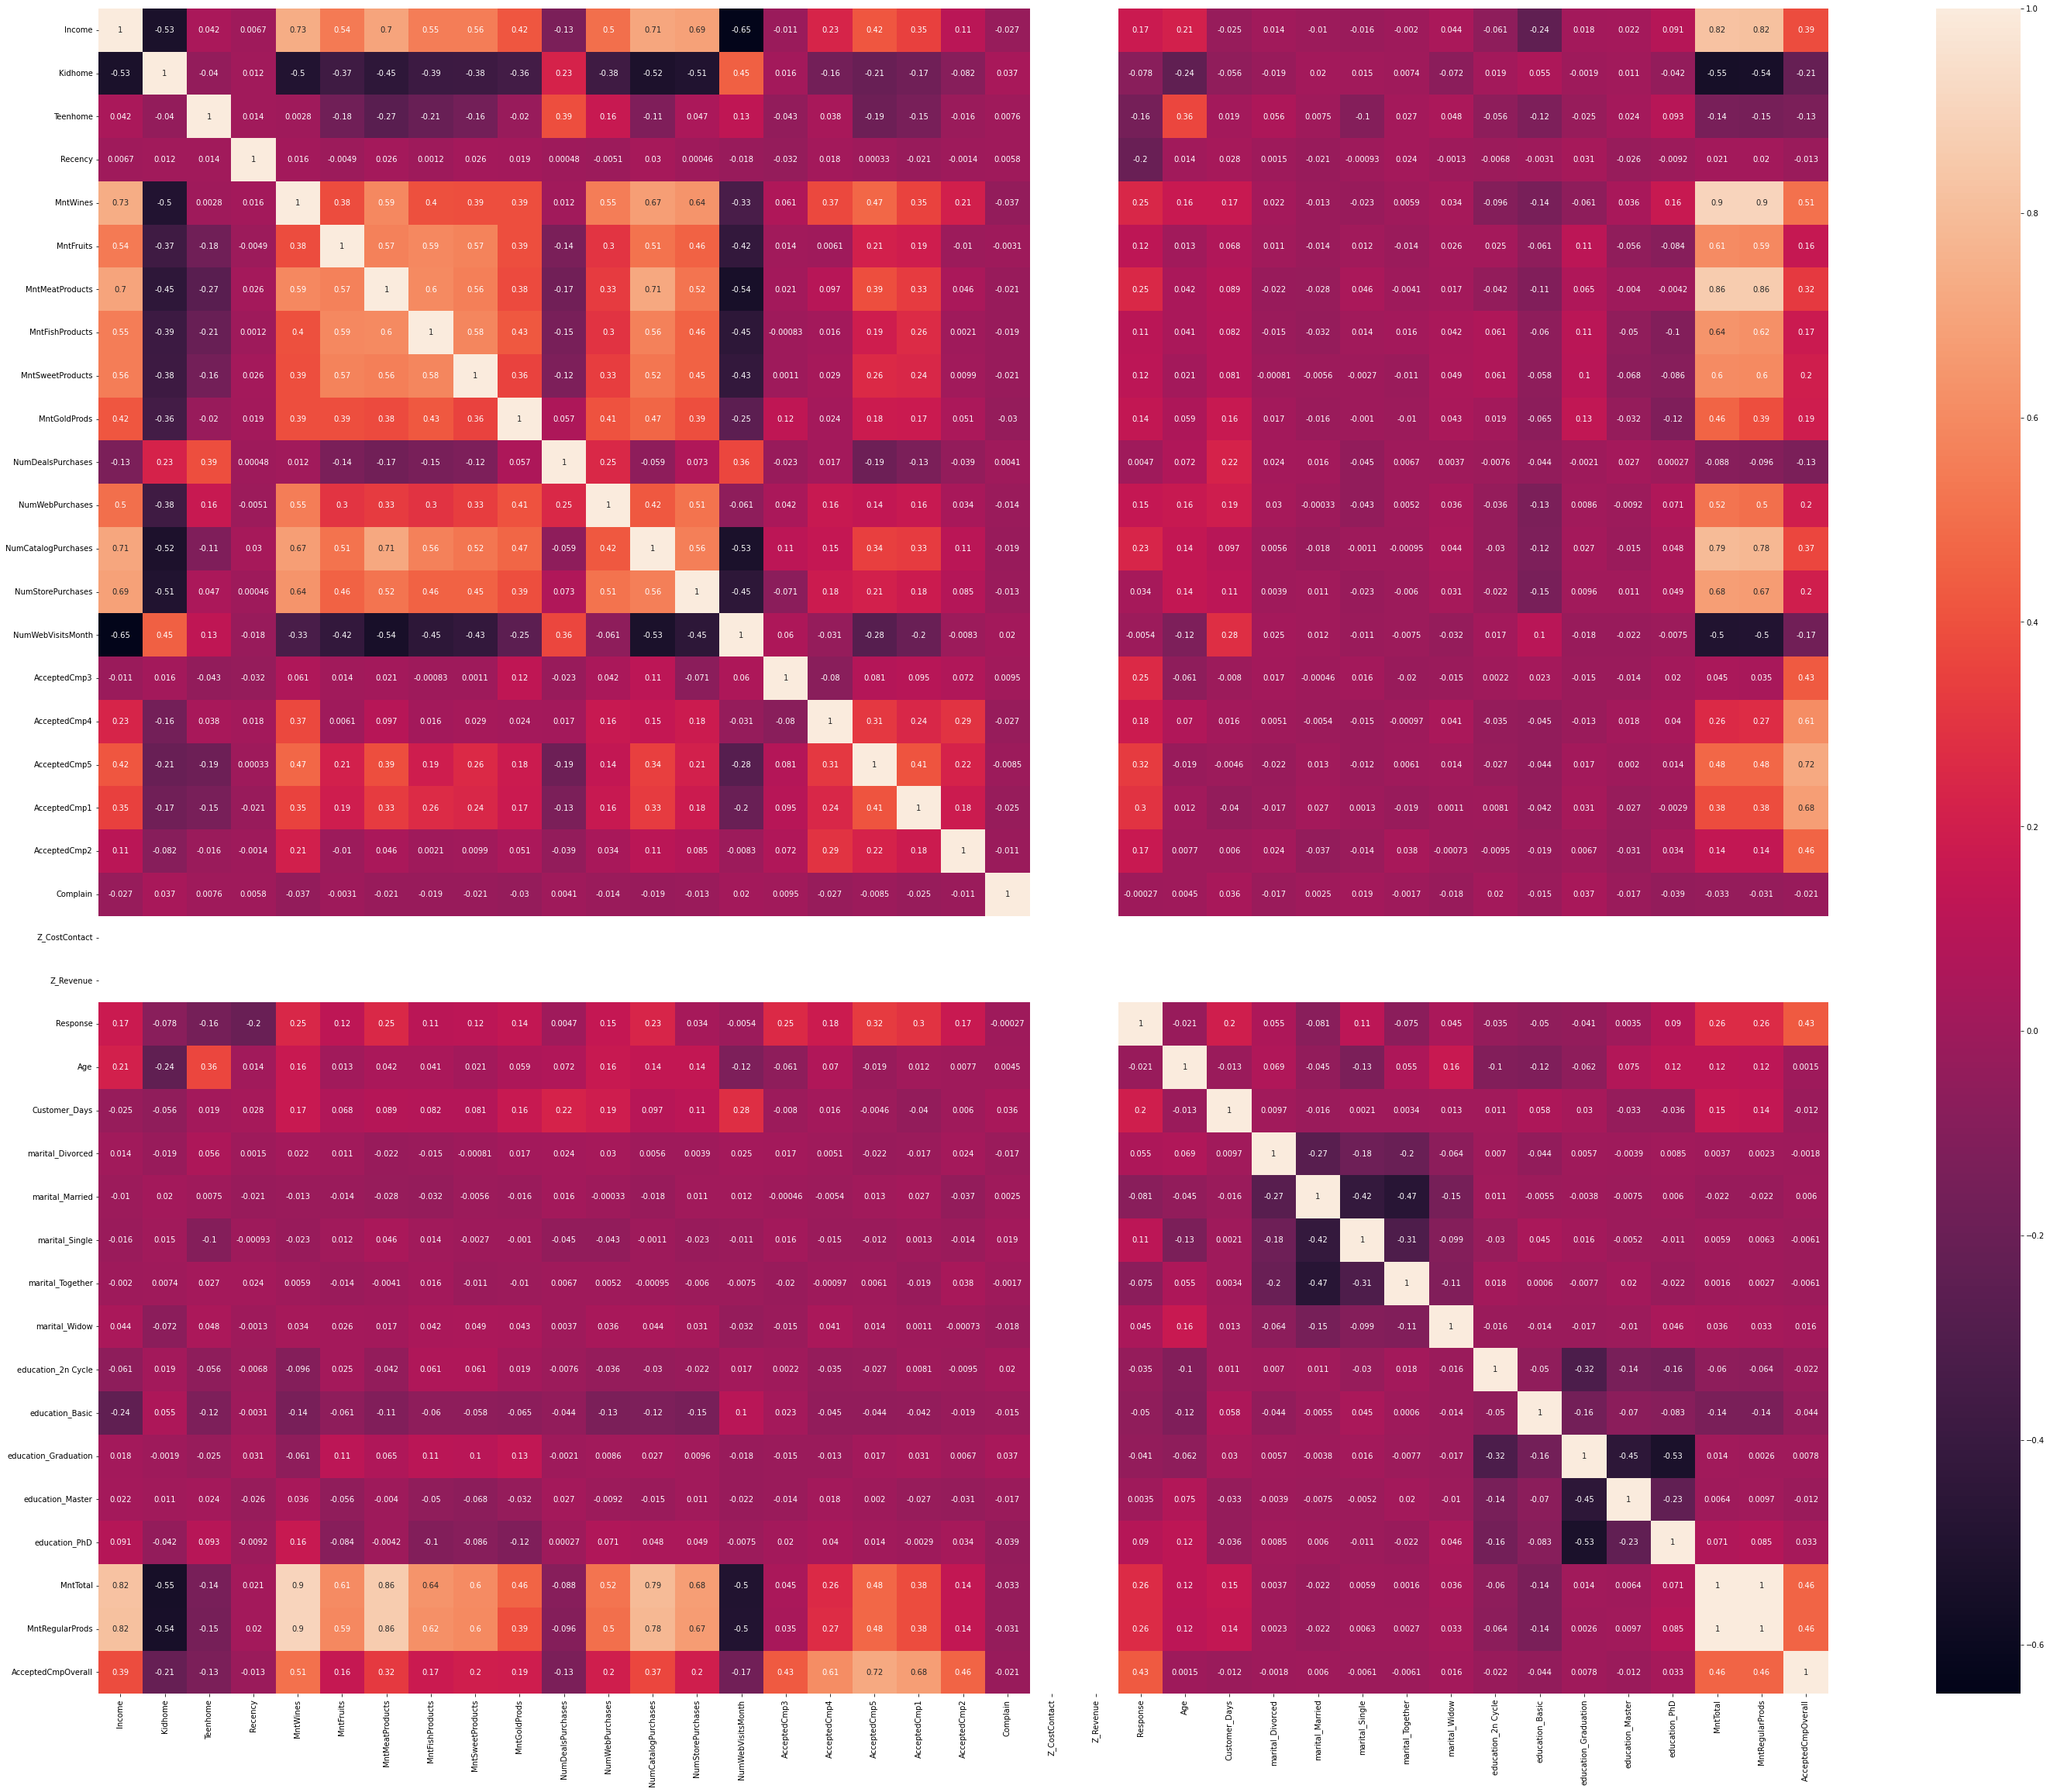

In [6]:
plt.figure(figsize=(50,40))
sn.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
for i in data.columns:
    if data[i].dtype=='<i8': # i8 -- int 64bit
        print('Type:--',data[i].dtype,'--',i,'--Mean:',int(data[i].mean()))
    else:
        print('Type:--',data[i].dtype,'--',i,'--Mode:',data[i].mode()[0])

Type:-- float64 -- Income --Mode: 7500.0
Type:-- int64 -- Kidhome --Mean: 0
Type:-- int64 -- Teenhome --Mean: 0
Type:-- int64 -- Recency --Mean: 49
Type:-- int64 -- MntWines --Mean: 306
Type:-- int64 -- MntFruits --Mean: 26
Type:-- int64 -- MntMeatProducts --Mean: 165
Type:-- int64 -- MntFishProducts --Mean: 37
Type:-- int64 -- MntSweetProducts --Mean: 27
Type:-- int64 -- MntGoldProds --Mean: 44
Type:-- int64 -- NumDealsPurchases --Mean: 2
Type:-- int64 -- NumWebPurchases --Mean: 4
Type:-- int64 -- NumCatalogPurchases --Mean: 2
Type:-- int64 -- NumStorePurchases --Mean: 5
Type:-- int64 -- NumWebVisitsMonth --Mean: 5
Type:-- int64 -- AcceptedCmp3 --Mean: 0
Type:-- int64 -- AcceptedCmp4 --Mean: 0
Type:-- int64 -- AcceptedCmp5 --Mean: 0
Type:-- int64 -- AcceptedCmp1 --Mean: 0
Type:-- int64 -- AcceptedCmp2 --Mean: 0
Type:-- int64 -- Complain --Mean: 0
Type:-- int64 -- Z_CostContact --Mean: 3
Type:-- int64 -- Z_Revenue --Mean: 11
Type:-- int64 -- Response --Mean: 0
Type:-- int64 -- Age --Me

0    1872
1     333
Name: Response, dtype: int64


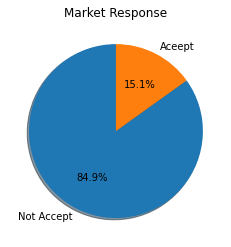

In [8]:
c = data['Response'].value_counts()
print(c)
plt.figure(figsize = (8,4))
label = ['Not Accept', 'Aceept']
plt.pie(c, autopct = '%1.1f%%', labels=label, shadow = True, startangle = 90)
plt.title("Market Response")
plt.show()

/home/kmaji/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


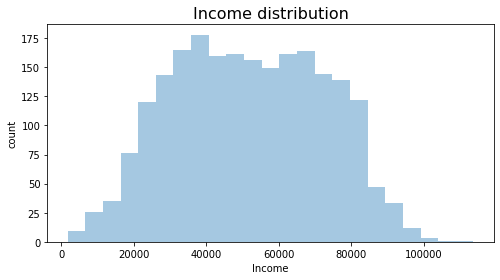

In [9]:
plt.figure(figsize = (8,4))
sn.distplot(data['Income'], kde = False, hist = True)
plt.title('Income distribution', size = 16)
plt.ylabel('count');

/tmp/ipykernel_25907/2709749266.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10, 5))


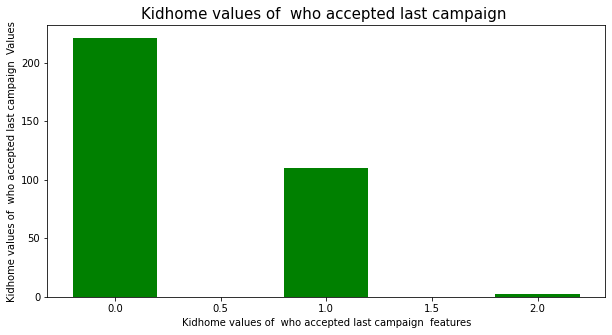

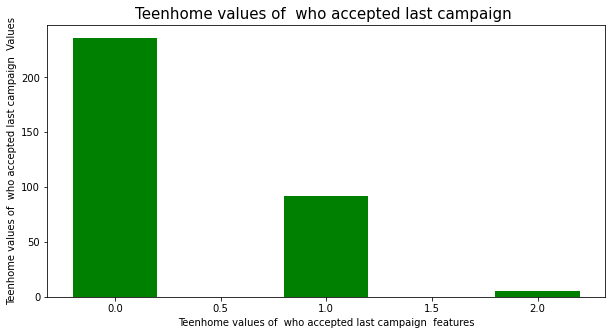

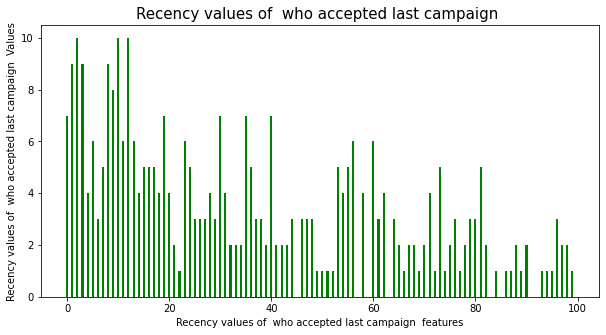

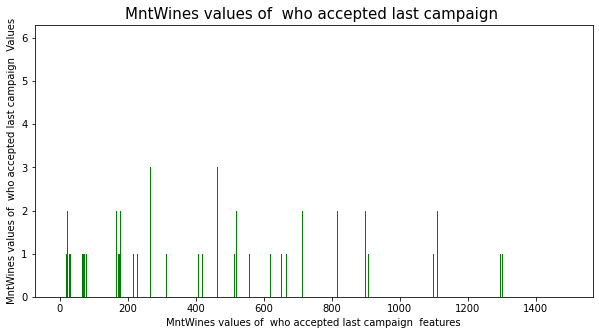

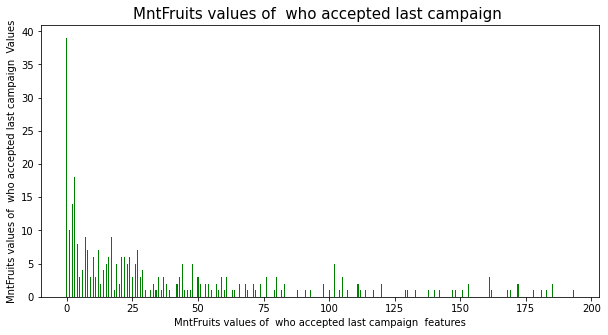

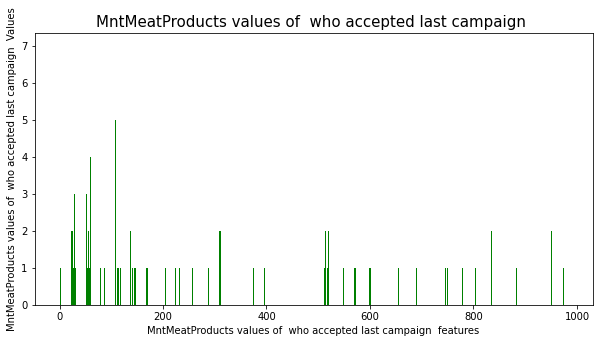

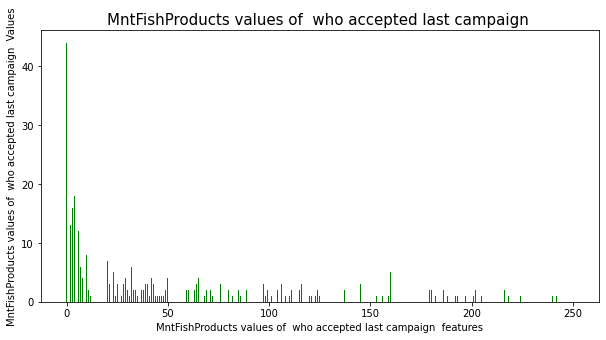

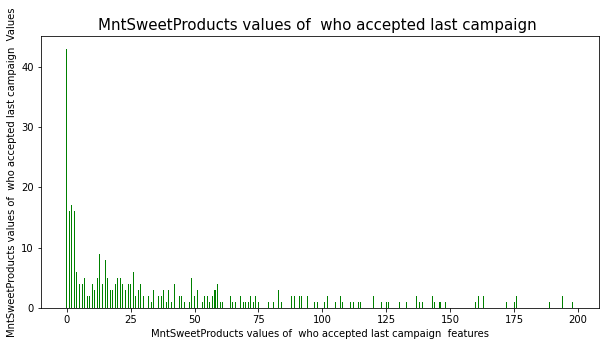

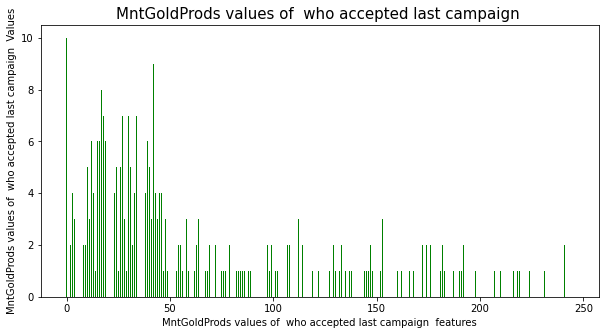

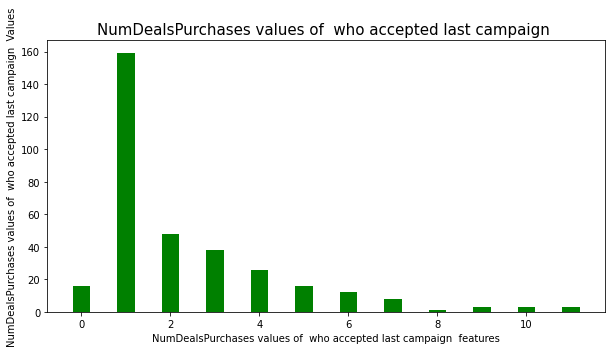

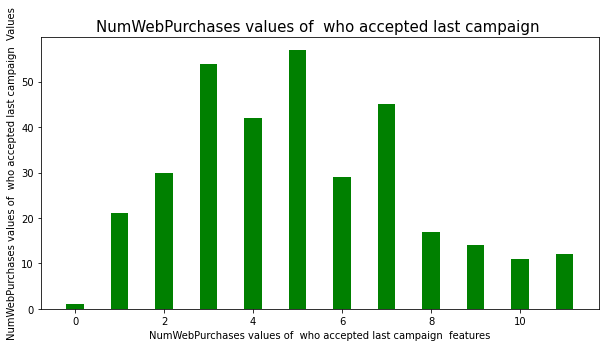

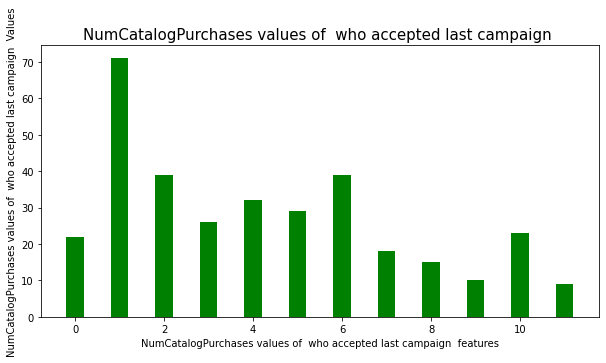

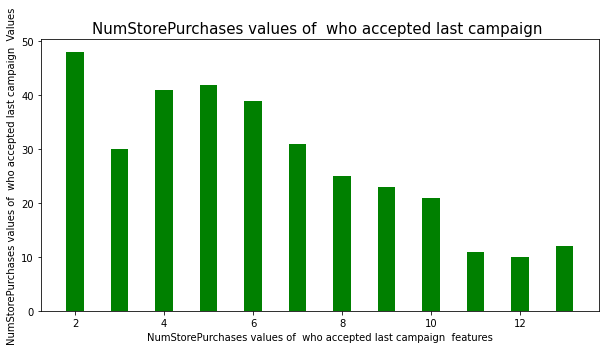

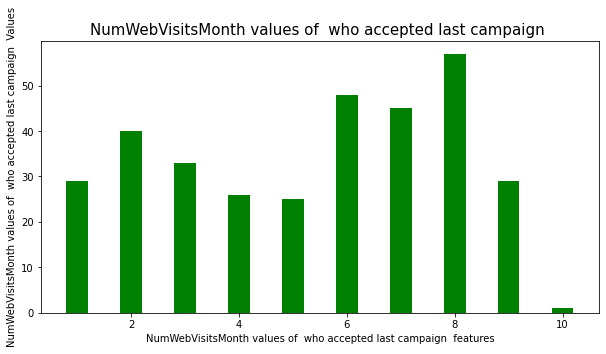

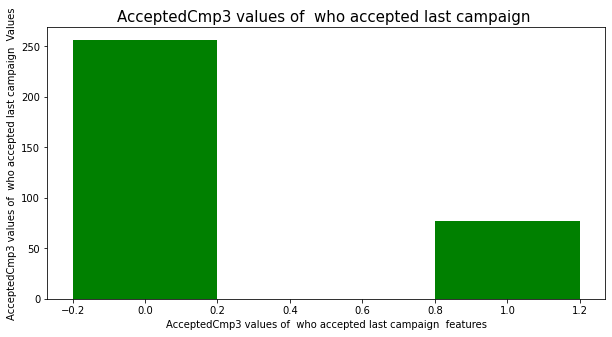

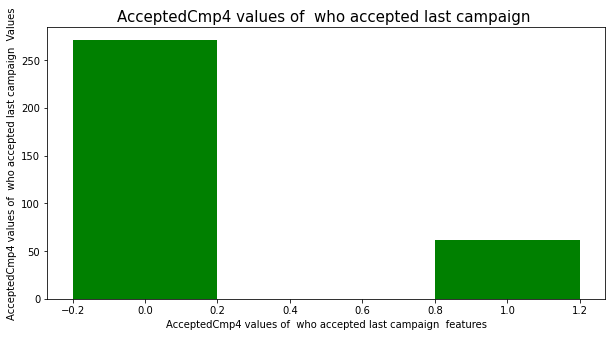

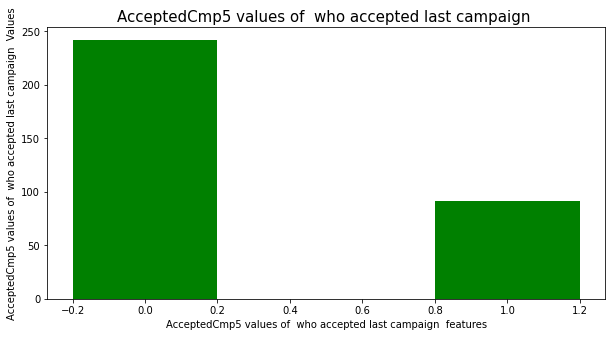

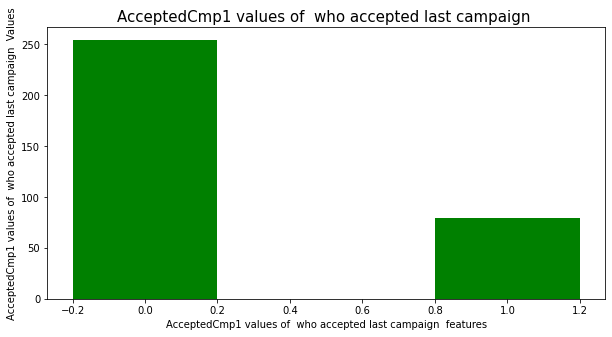

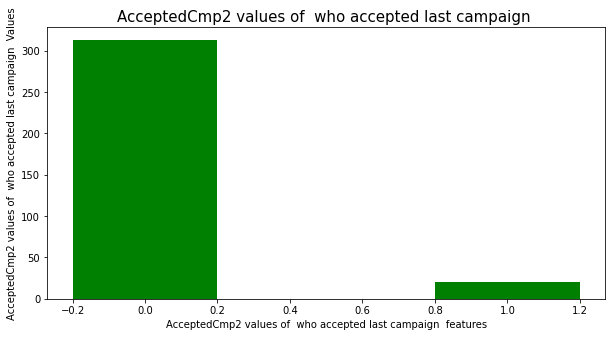

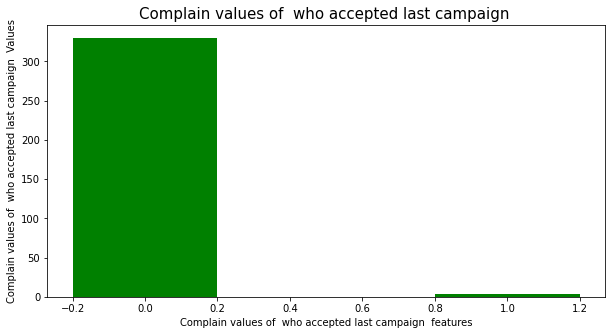

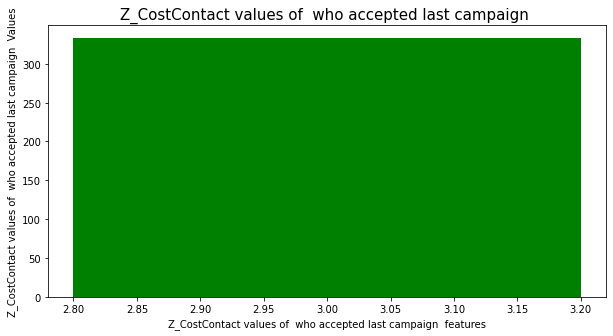

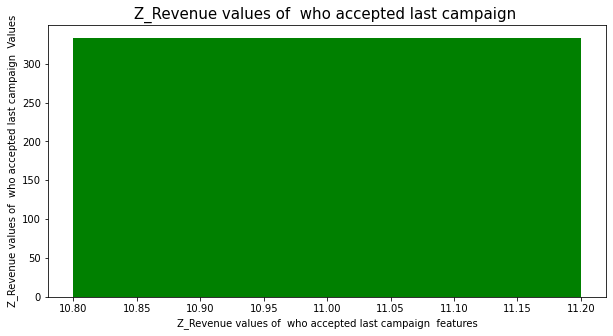

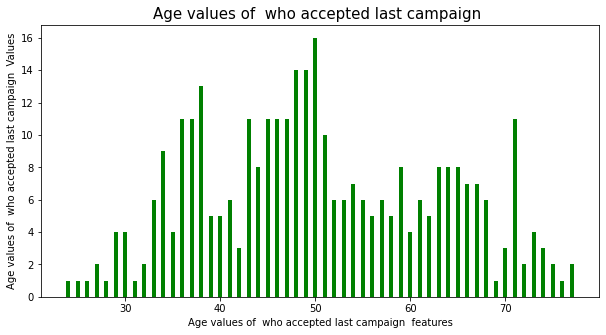

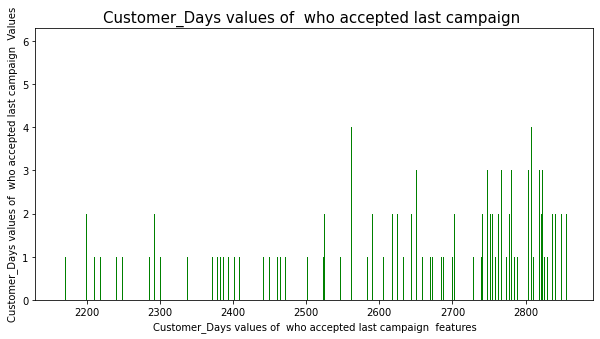

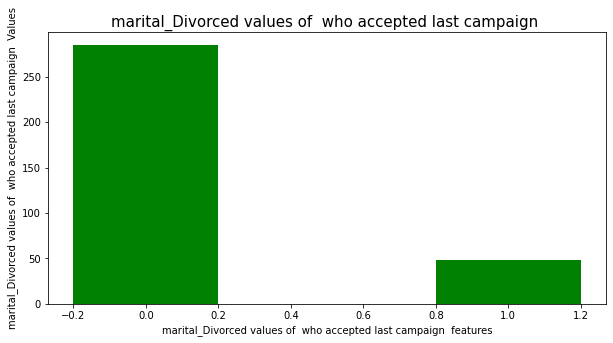

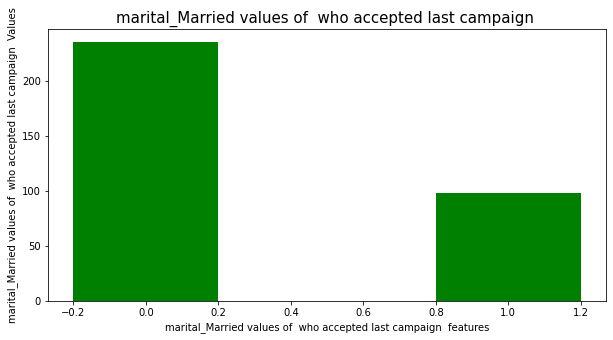

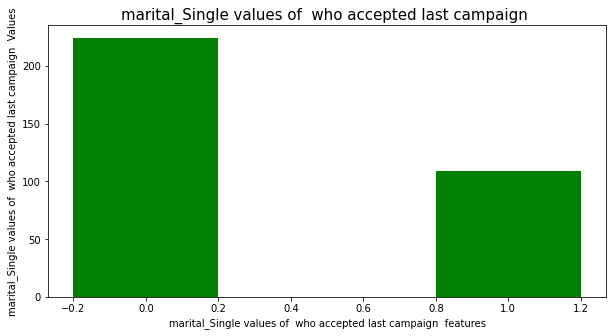

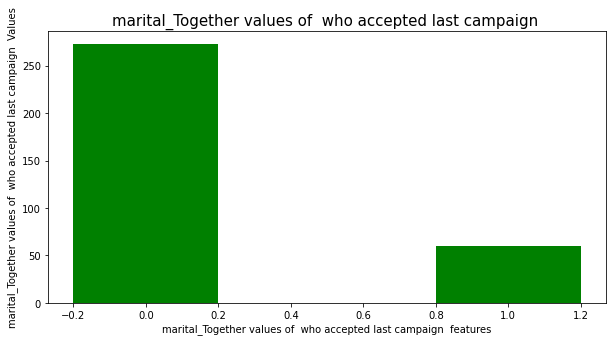

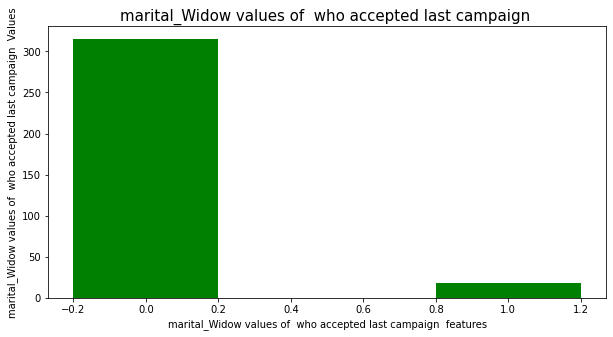

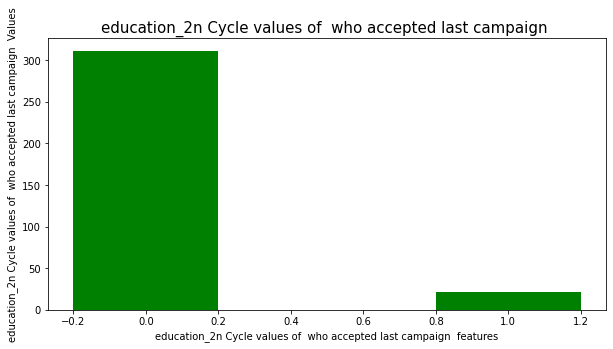

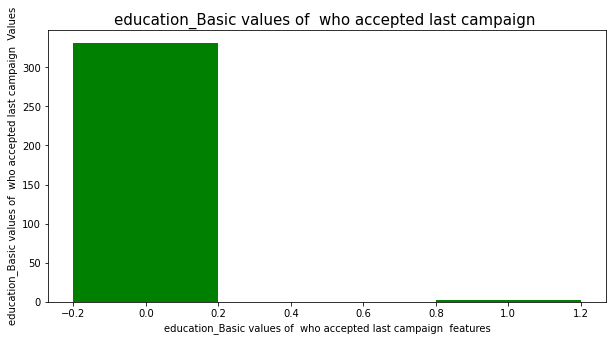

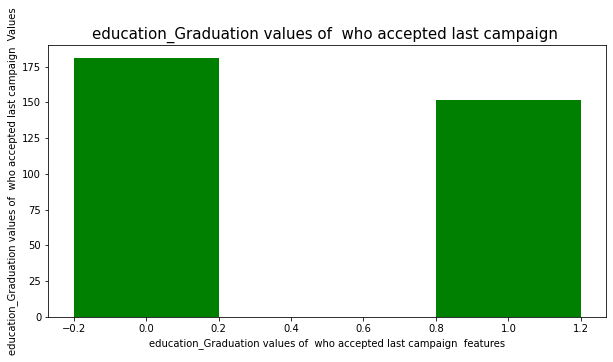

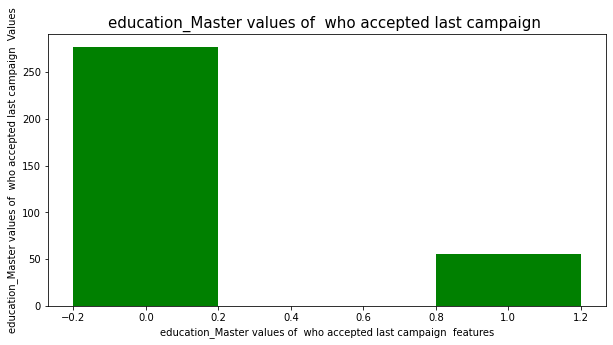

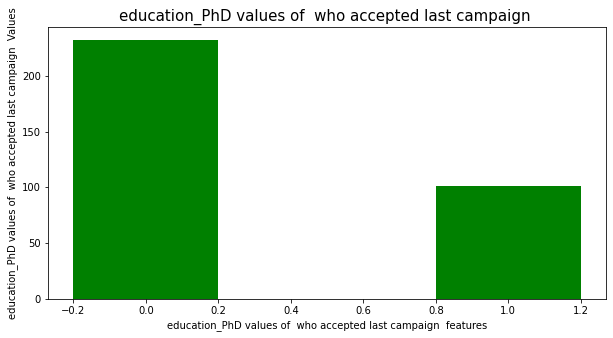

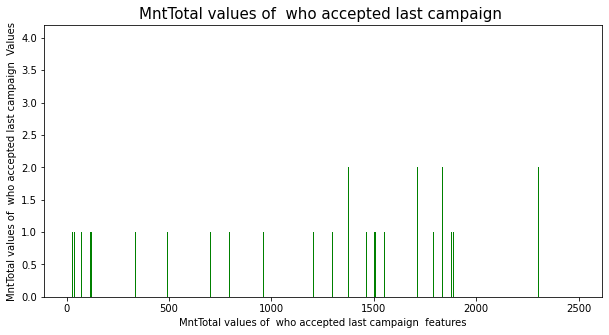

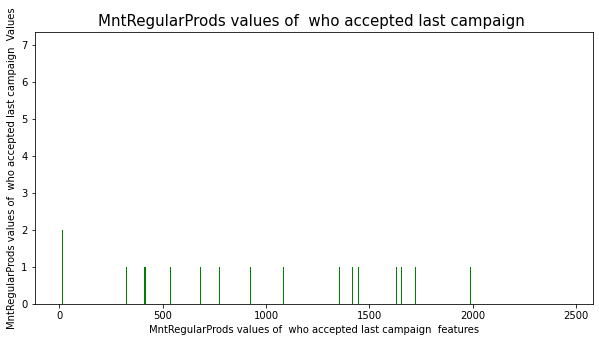

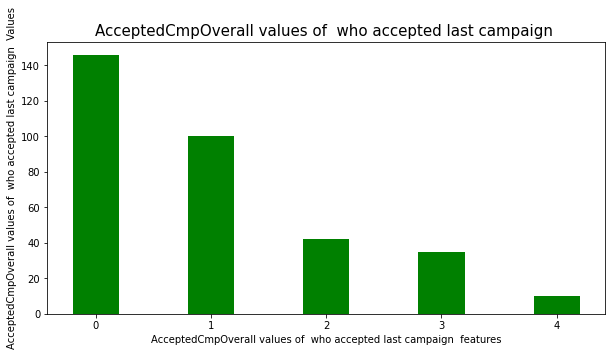

In [10]:
for _ in data.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in data[data['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(data[data['Response']==1][f'{_}'][data[data['Response']==1][f'{_}']==i]) for i in data[data['Response']==1][f'{_}'].unique()]

        plt.bar(uniqe_list, uniqe_values, color ='green',width = 0.4)
        plt.xlabel(f"{_} values of  who accepted last campaign  features",fontsize=10)
        plt.ylabel(f"{_} values of  who accepted last campaign  Values",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15);